## Import Required Libraries

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
import warnings
warnings.filterwarnings('ignore')


In [56]:
image = cv2.imread('Set-1-program-1-Trafficimage.jpg')


## 2. Convert to Grayscale using User-Defined Function

Grayscale image shape: (168, 300)


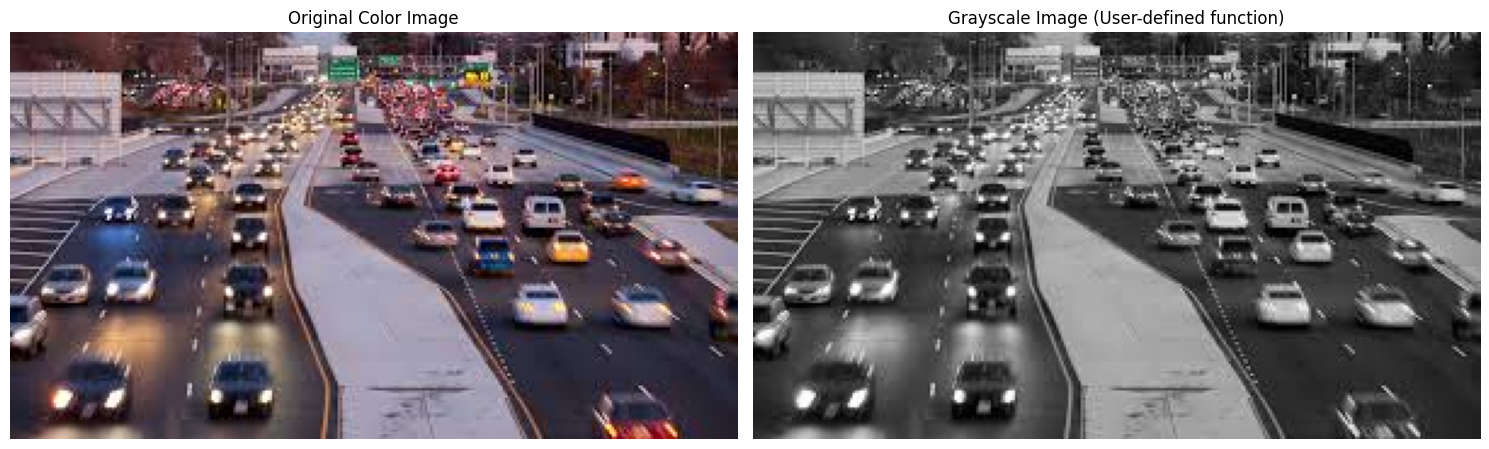

In [57]:
def rgb_to_grayscale(image):
    if len(image.shape) == 3:
        return 0.299 * image[:,:,2] + 0.587 * image[:,:,1] + 0.114 * image[:,:,0]
    return image

gray_image = rgb_to_grayscale(image).astype(np.uint8)
print(f"Grayscale image shape: {gray_image.shape}")

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image (User-defined function)')
plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Interpolation Functions (User-Defined)

In [58]:
def nearest_neighbor_interpolation(image, scale_factor):
    old_h, old_w = image.shape
    new_h, new_w = int(old_h * scale_factor), int(old_w * scale_factor)
    new_image = np.zeros((new_h, new_w), dtype=image.dtype)
    
    for i in range(new_h):
        for j in range(new_w):
            old_i = int(i / scale_factor)
            old_j = int(j / scale_factor)
            old_i = min(old_i, old_h - 1)
            old_j = min(old_j, old_w - 1)
            new_image[i, j] = image[old_i, old_j]
    
    return new_image



## 4. Apply Different Interpolation Techniques

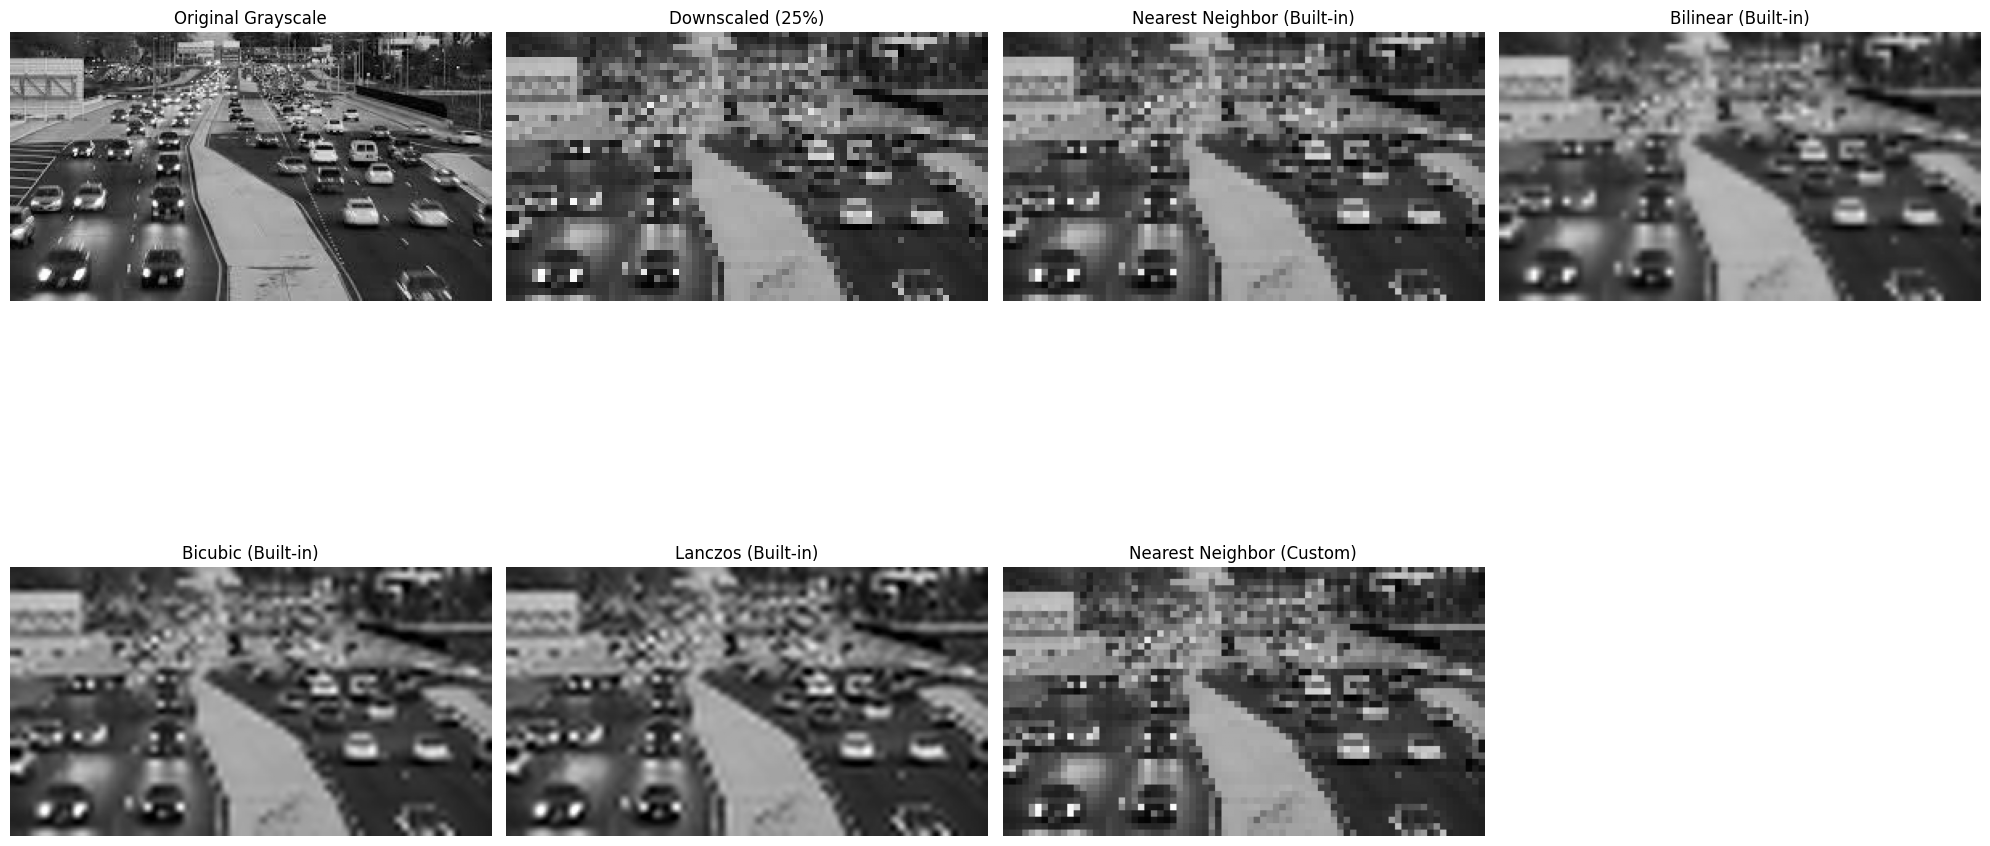

In [59]:
downscale_factor = 0.25
upscale_factor = 4.0

downscaled = cv2.resize(gray_image, None, fx=downscale_factor, fy=downscale_factor)


nearest_builtin = cv2.resize(downscaled, gray_image.shape[::-1], interpolation=cv2.INTER_NEAREST)
bilinear_builtin = cv2.resize(downscaled, gray_image.shape[::-1], interpolation=cv2.INTER_LINEAR)
bicubic_builtin = cv2.resize(downscaled, gray_image.shape[::-1], interpolation=cv2.INTER_CUBIC)
lanczos_builtin = cv2.resize(downscaled, gray_image.shape[::-1], interpolation=cv2.INTER_LANCZOS4)

nearest_custom = nearest_neighbor_interpolation(downscaled, upscale_factor)

plt.figure(figsize=(20, 12))

plt.subplot(2, 4, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(downscaled, cmap='gray')
plt.title('Downscaled (25%)')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(nearest_builtin, cmap='gray')
plt.title('Nearest Neighbor (Built-in)')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(bilinear_builtin, cmap='gray')
plt.title('Bilinear (Built-in)')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(bicubic_builtin, cmap='gray')
plt.title('Bicubic (Built-in)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(lanczos_builtin, cmap='gray')
plt.title('Lanczos (Built-in)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(nearest_custom, cmap='gray')
plt.title('Nearest Neighbor (Custom)')
plt.axis('off')



plt.tight_layout()
plt.show()

## 5. Quantization Functions

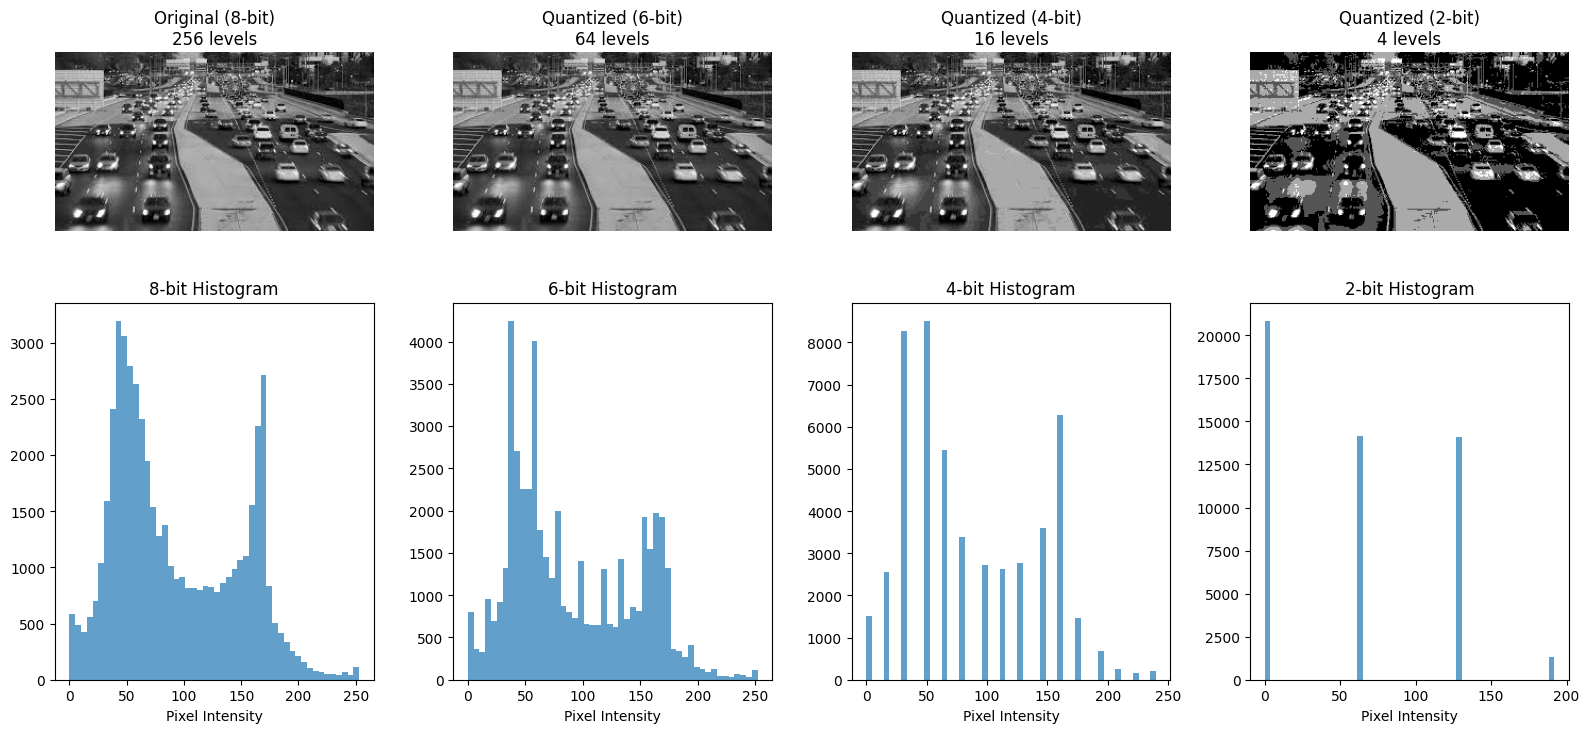

In [60]:
def quantize_image(image, bits):
    levels = 2 ** bits
    quantized = np.floor(image / (256 / levels)) * (256 / levels)
    return np.clip(quantized, 0, 255).astype(np.uint8)

original_8bit = gray_image
quantized_6bit = quantize_image(gray_image, 6)
quantized_4bit = quantize_image(gray_image, 4)
quantized_2bit = quantize_image(gray_image, 2)

plt.figure(figsize=(16, 8))

plt.subplot(2, 4, 1)
plt.imshow(original_8bit, cmap='gray')
plt.title('Original (8-bit)\n256 levels')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(quantized_6bit, cmap='gray')
plt.title('Quantized (6-bit)\n64 levels')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(quantized_4bit, cmap='gray')
plt.title('Quantized (4-bit)\n16 levels')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(quantized_2bit, cmap='gray')
plt.title('Quantized (2-bit)\n4 levels')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.hist(original_8bit.flatten(), bins=50, alpha=0.7)
plt.title('8-bit Histogram')
plt.xlabel('Pixel Intensity')

plt.subplot(2, 4, 6)
plt.hist(quantized_6bit.flatten(), bins=50, alpha=0.7)
plt.title('6-bit Histogram')
plt.xlabel('Pixel Intensity')

plt.subplot(2, 4, 7)
plt.hist(quantized_4bit.flatten(), bins=50, alpha=0.7)
plt.title('4-bit Histogram')
plt.xlabel('Pixel Intensity')

plt.subplot(2, 4, 8)
plt.hist(quantized_2bit.flatten(), bins=50, alpha=0.7)
plt.title('2-bit Histogram')
plt.xlabel('Pixel Intensity')

plt.tight_layout()
plt.show()

## 6. Demonstrate Artifacts - Checkerboard Effect and False Contouring

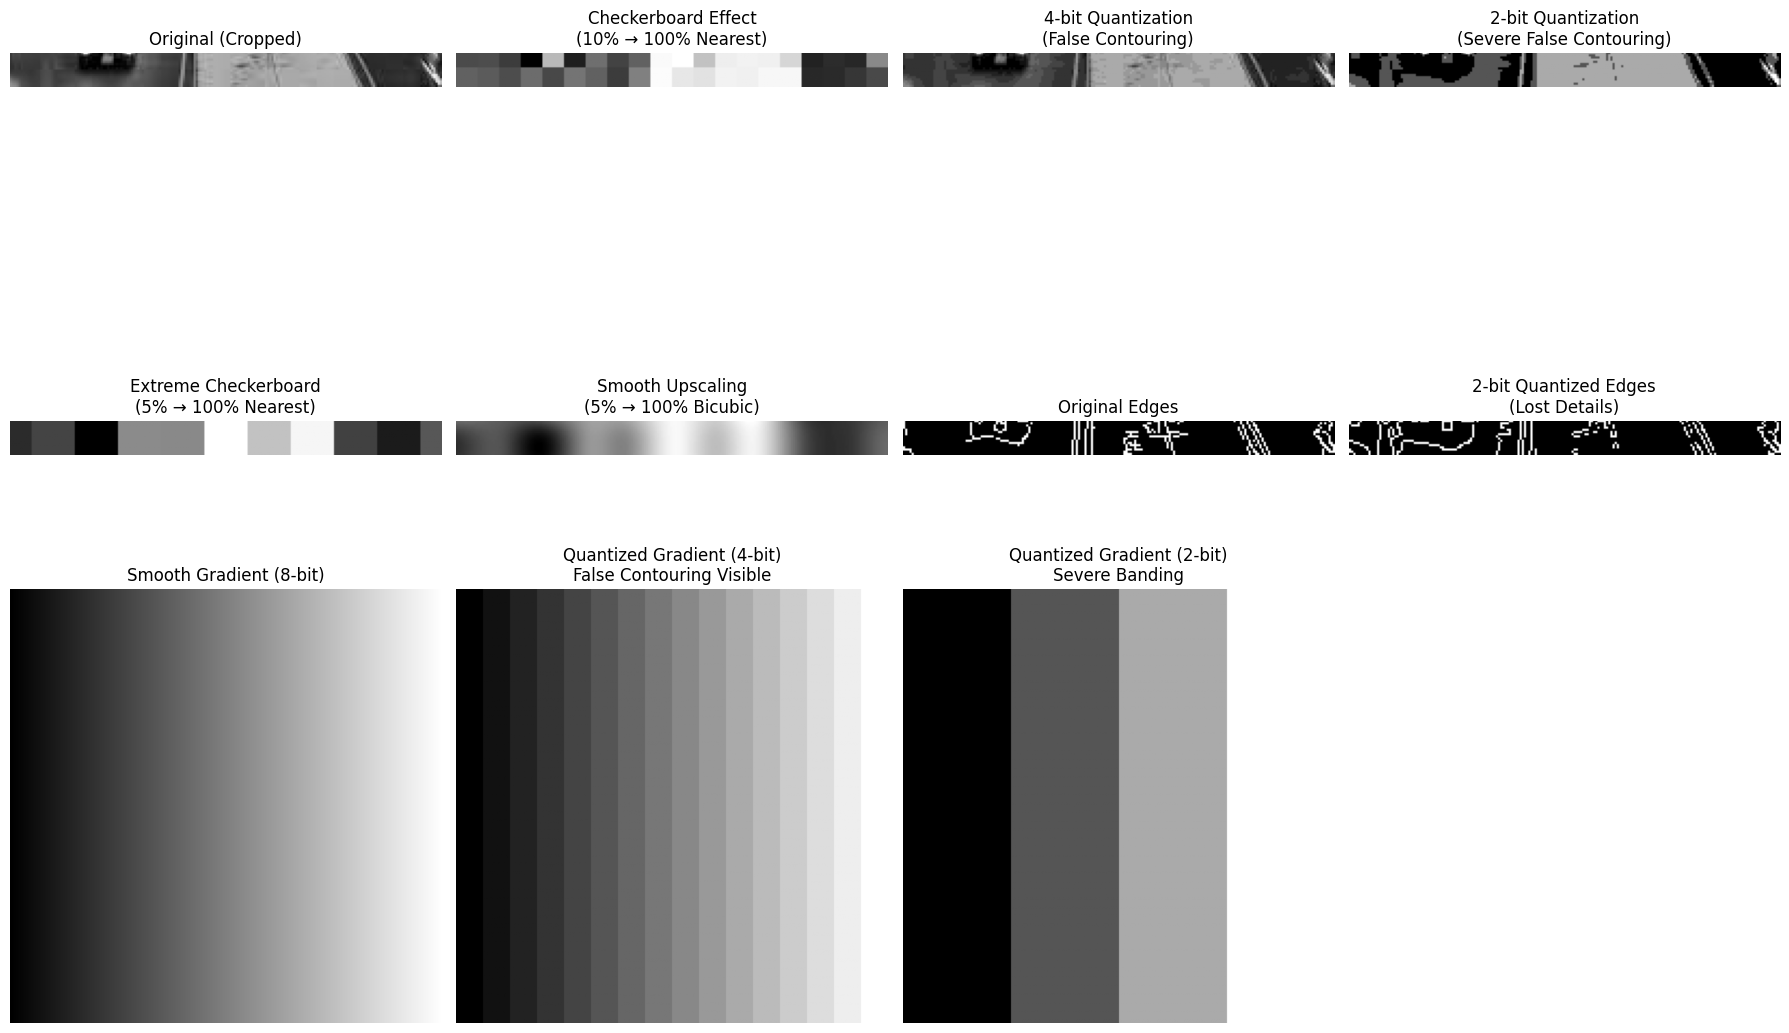

In [ ]:
very_low_res = cv2.resize(gray_image, None, fx=0.1, fy=0.1)
checkerboard_effect = cv2.resize(very_low_res, gray_image.shape[::-1], interpolation=cv2.INTER_NEAREST)

h, w = gray_image.shape
crop_size = 200
start_h, start_w = h//2 - crop_size//2, w//2 - crop_size//2

plt.figure(figsize=(18, 12))

plt.subplot(3, 4, 1)
plt.imshow(gray_image[start_h:start_h+crop_size, start_w:start_w+crop_size], cmap='gray')
plt.title('Original (Cropped)')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(checkerboard_effect[start_h:start_h+crop_size, start_w:start_w+crop_size], cmap='gray')
plt.title('Checkerboard Effect\n(10% → 100% Nearest)')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(quantized_4bit[start_h:start_h+crop_size, start_w:start_w+crop_size], cmap='gray')
plt.title('4-bit Quantization\n(False Contouring)')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(quantized_2bit[start_h:start_h+crop_size, start_w:start_w+crop_size], cmap='gray')
plt.title('2-bit Quantization\n(Severe False Contouring)')
plt.axis('off')

plt.subplot(3, 4, 5)
very_low_res_2 = cv2.resize(gray_image, None, fx=0.05, fy=0.05)
extreme_checkerboard = cv2.resize(very_low_res_2, gray_image.shape[::-1], interpolation=cv2.INTER_NEAREST)
plt.imshow(extreme_checkerboard[start_h:start_h+crop_size, start_w:start_w+crop_size], cmap='gray')
plt.title('Extreme Checkerboard\n(5% → 100% Nearest)')
plt.axis('off')

plt.subplot(3, 4, 6)
smooth_upscale = cv2.resize(very_low_res_2, gray_image.shape[::-1], interpolation=cv2.INTER_CUBIC)
plt.imshow(smooth_upscale[start_h:start_h+crop_size, start_w:start_w+crop_size], cmap='gray')
plt.title('Smooth Upscaling\n(5% → 100% Bicubic)')
plt.axis('off')

edge_original = cv2.Canny(gray_image, 50, 150)
edge_quantized = cv2.Canny(quantized_2bit, 50, 150)

plt.subplot(3, 4, 7)
plt.imshow(edge_original[start_h:start_h+crop_size, start_w:start_w+crop_size], cmap='gray')
plt.title('Original Edges')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(edge_quantized[start_h:start_h+crop_size, start_w:start_w+crop_size], cmap='gray')
plt.title('2-bit Quantized Edges\n(Lost Details)')
plt.axis('off')

gradient = np.linspace(0, 255, 256).reshape(1, -1)
gradient_img = np.repeat(gradient, 50, axis=0)

plt.subplot(3, 4, 9)
plt.imshow(gradient_img, cmap='gray', aspect='auto')
plt.title('Smooth Gradient (8-bit)')
plt.axis('off')

plt.subplot(3, 4, 10)
quantized_gradient = quantize_image(gradient_img, 4)
plt.imshow(quantized_gradient, cmap='gray', aspect='auto')
plt.title('Quantized Gradient (4-bit)\nFalse Contouring Visible')
plt.axis('off')

plt.subplot(3, 4, 11)
quantized_gradient_2bit = quantize_image(gradient_img, 2)
plt.imshow(quantized_gradient_2bit, cmap='gray', aspect='auto')
plt.title('Quantized Gradient (2-bit)\nSevere Banding')
plt.axis('off')

plt.tight_layout()
plt.show()

## 7. Quality Metrics and Analysis

In [62]:
def calculate_psnr(original, processed):
    mse = np.mean((original.astype(float) - processed.astype(float)) ** 2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse))

def calculate_ssim_simple(img1, img2):
    mu1 = np.mean(img1)
    mu2 = np.mean(img2)
    sigma1 = np.var(img1)
    sigma2 = np.var(img2)
    sigma12 = np.mean((img1 - mu1) * (img2 - mu2))
    
    c1 = (0.01 * 255) ** 2
    c2 = (0.03 * 255) ** 2
    
    ssim = ((2 * mu1 * mu2 + c1) * (2 * sigma12 + c2)) / ((mu1**2 + mu2**2 + c1) * (sigma1 + sigma2 + c2))
    return ssim

interpolation_methods = {
    'Nearest (Built-in)': nearest_builtin,
    'Bilinear (Built-in)': bilinear_builtin,
    'Bicubic (Built-in)': bicubic_builtin,
    'Lanczos (Built-in)': lanczos_builtin,
    'Nearest (Custom)': nearest_custom,
    'Bilinear (Custom)': bilinear_custom
}

quantization_methods = {
    '8-bit': original_8bit,
    '6-bit': quantized_6bit,
    '4-bit': quantized_4bit,
    '2-bit': quantized_2bit
}

print("=== INTERPOLATION QUALITY METRICS ===")
print(f"{'Method':<25} {'PSNR (dB)':<12} {'SSIM':<10}")
print("-" * 50)
for name, img in interpolation_methods.items():
    psnr = calculate_psnr(gray_image, img)
    ssim = calculate_ssim_simple(gray_image, img)
    print(f"{name:<25} {psnr:<12.2f} {ssim:<10.4f}")

print("\n=== QUANTIZATION QUALITY METRICS ===")
print(f"{'Method':<15} {'PSNR (dB)':<12} {'SSIM':<10} {'Levels':<8}")
print("-" * 50)
for name, img in quantization_methods.items():
    psnr = calculate_psnr(gray_image, img)
    ssim = calculate_ssim_simple(gray_image, img)
    levels = len(np.unique(img))
    print(f"{name:<15} {psnr:<12.2f} {ssim:<10.4f} {levels:<8}")



=== INTERPOLATION QUALITY METRICS ===
Method                    PSNR (dB)    SSIM      
--------------------------------------------------
Nearest (Built-in)        18.58        0.8377    
Bilinear (Built-in)       19.64        0.8596    
Bicubic (Built-in)        19.56        0.8664    
Lanczos (Built-in)        19.37        0.8616    
Nearest (Custom)          18.58        0.8377    
Bilinear (Custom)         17.93        0.7939    

=== QUANTIZATION QUALITY METRICS ===
Method          PSNR (dB)    SSIM       Levels  
--------------------------------------------------
8-bit           inf          1.0000     254     
6-bit           42.68        0.9997     64      
4-bit           29.31        0.9930     16      
2-bit           16.49        0.8586     4       


 QUALITY vs SAMPLING RESOLUTION:
   • Low sampling (25% → 100%): PSNR = 18.58 dB
   • Low quantization (4-bit): PSNR = 29.31 dB

## 8. Analysis and Conclusions

COMPRESSION & TRANSMISSION IMPACT:
• Quantization reduces bandwidth requirements significantly
• Lower bit depths enable faster transmission over networks
• Trade-off between real-time performance and detection accuracy
• Progressive transmission possible with multiple quantization levels